In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#read resale flat data from different time periods
df1=pd.read_csv("C:/Users/jk11b/Downloads/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")
df2=pd.read_csv("C:/Users/jk11b/Downloads/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
df3=pd.read_csv("C:/Users/jk11b/Downloads/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df4=pd.read_csv("C:/Users/jk11b/Downloads/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df5=pd.read_csv("C:/Users/jk11b/Downloads/Resale flat prices based on registration date from Jan-2017 onwards.csv")

In [3]:
#combine all datasets into a single dataframe
data=pd.concat([df1,df2,df3,df4,df5])

In [4]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964813 entries, 0 to 218609
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                964813 non-null  object 
 1   town                 964813 non-null  object 
 2   flat_type            964813 non-null  object 
 3   block                964813 non-null  object 
 4   street_name          964813 non-null  object 
 5   storey_range         964813 non-null  object 
 6   floor_area_sqm       964813 non-null  float64
 7   flat_model           964813 non-null  object 
 8   lease_commence_date  964813 non-null  int64  
 9   resale_price         964813 non-null  float64
 10  remaining_lease      255763 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 88.3+ MB


In [6]:
data["remaining_lease"].tail()

218605    61 years 03 months
218606    61 years 04 months
218607    61 years 04 months
218608    61 years 06 months
218609    61 years 06 months
Name: remaining_lease, dtype: object

In [7]:
#split month column (YYYY-MM) into year and month
ym=data["month"].astype(str).str.split("-",n=1,expand=True)

#Insert year as a new column
data.insert(0,"year",ym[0].astype(int))

#keep only month column
data["month"]=ym[1].astype(int)

In [8]:
data.head()

,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [9]:
data["remaining_lease"] = (
    data["lease_commence_date"] + 99 - data["year"]
)

In [10]:
#about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964813 entries, 0 to 218609
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 964813 non-null  int64  
 1   month                964813 non-null  int64  
 2   town                 964813 non-null  object 
 3   flat_type            964813 non-null  object 
 4   block                964813 non-null  object 
 5   street_name          964813 non-null  object 
 6   storey_range         964813 non-null  object 
 7   floor_area_sqm       964813 non-null  float64
 8   flat_model           964813 non-null  object 
 9   lease_commence_date  964813 non-null  int64  
 10  resale_price         964813 non-null  float64
 11  remaining_lease      964813 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 95.7+ MB


In [11]:
#count duplicated rows
data.duplicated().sum()

np.int64(2000)

In [12]:
#drop duplicated rows
data=data.drop_duplicates()

In [13]:
ignore_col = "resale_price"
cols = data.columns.difference([ignore_col])
data.duplicated(subset=cols, keep=False).sum()

np.int64(56247)

In [14]:
data.shape

(962813, 12)

In [15]:
data["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [16]:
data["flat_model"].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [17]:
data["flat_model"].str.upper().unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [18]:
data["flat_model"]=data["flat_model"].str.upper()

In [19]:
data["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [20]:
data["street_name"].nunique()

593

In [21]:
data["street_name"].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

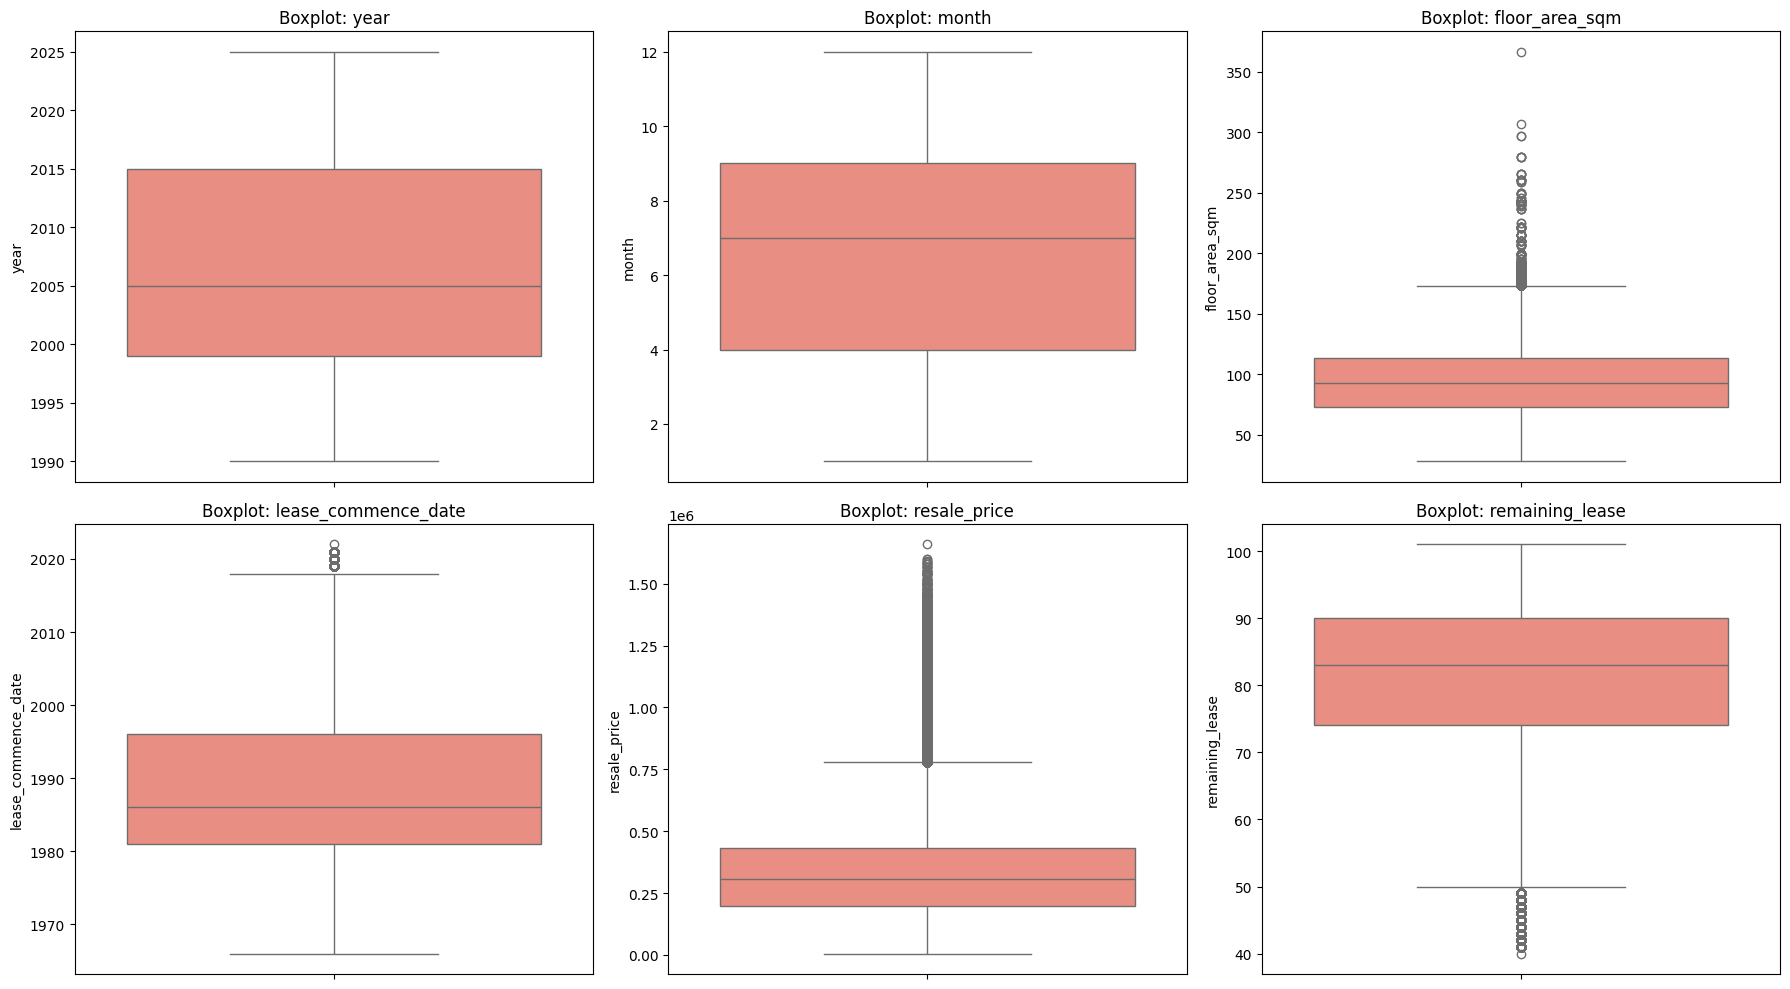

In [22]:
# Boxplots for outlier detections
num_cols = data.select_dtypes(include=np.number).columns
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_cols)/3)), ncols=3, figsize=(18, 5*int(np.ceil(len(num_cols)/3))))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(y=data[col], ax=axes[i], color='salmon')
    axes[i].set_title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

In [23]:
outlier_cols = ["floor_area_sqm","lease_commence_date","remaining_lease"]
for col in outlier_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    data[col]=np.clip(data[col],ll,ul)

In [24]:
data = data.drop_duplicates(subset=cols, keep="first")

**EDA**

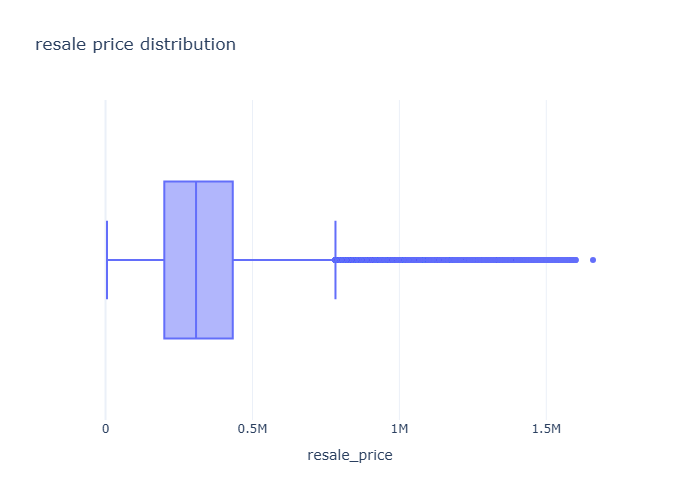

In [25]:
#plot to visualize resale price distribution and identify outliers
fig=px.box(data,x="resale_price",title="resale price distribution",template="plotly_white").show("png")

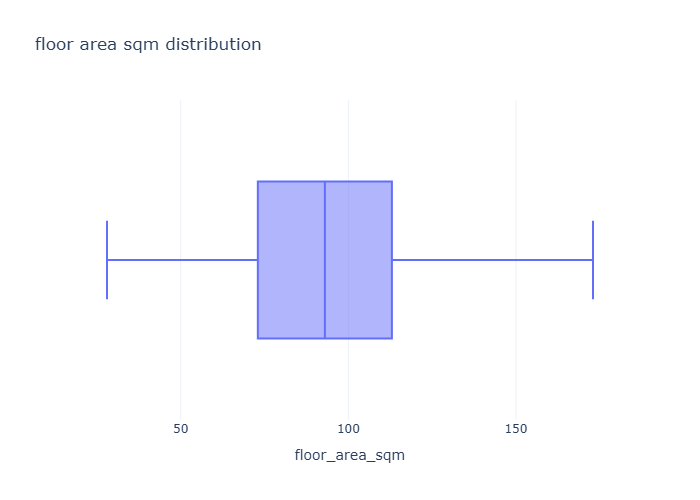

In [26]:
#box plot to visualize floor_area_sqm distribution and identify outliers
px.box(data, x="floor_area_sqm",title="floor area sqm distribution",template="plotly_white").show("png")

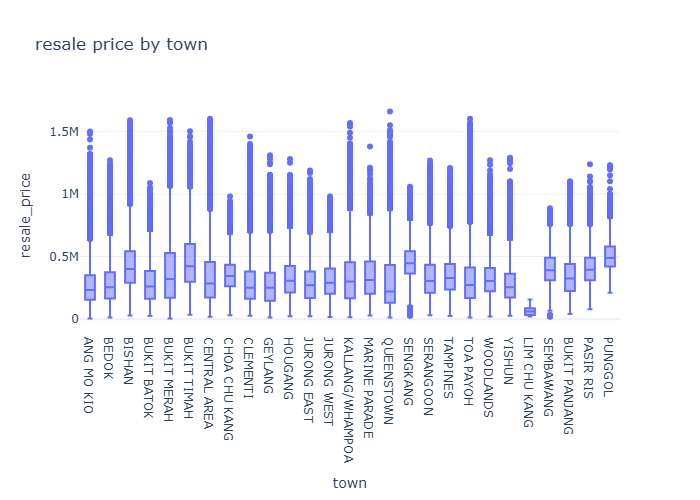

In [27]:
#box plot to compare resale_price distribution across different towns
fig=px.box(data, x="town", y="resale_price",title="resale price by town",template="plotly_white").show("png")

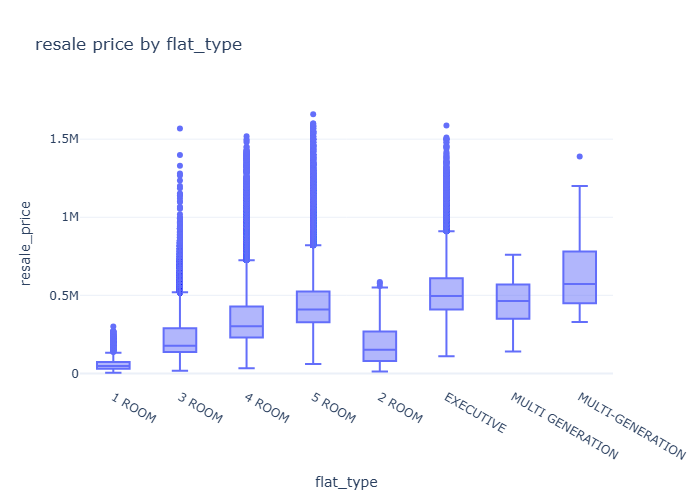

In [28]:
#box plot to compare resale_price distribution across different flat_type
fig=px.box(data, x="flat_type", y="resale_price", title="resale price by flat_type",template="plotly_white").show("png")

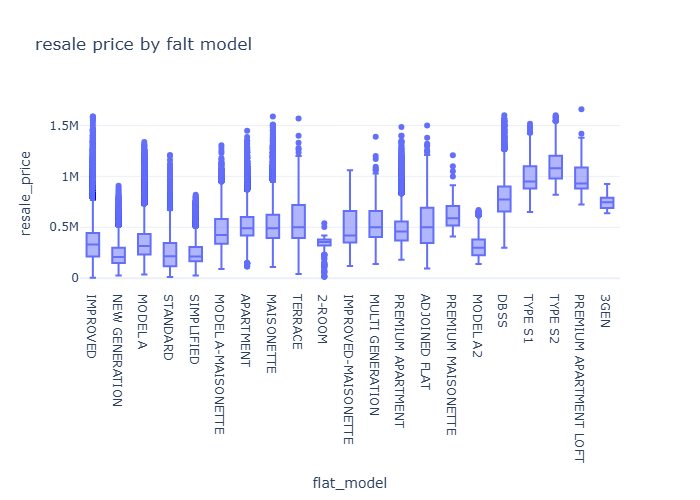

In [29]:
#box plot to compare resale_price distribution across different flat_model
fig=px.box(data, x="flat_model", y="resale_price", title="resale price by falt model",template="plotly_white").show("png")

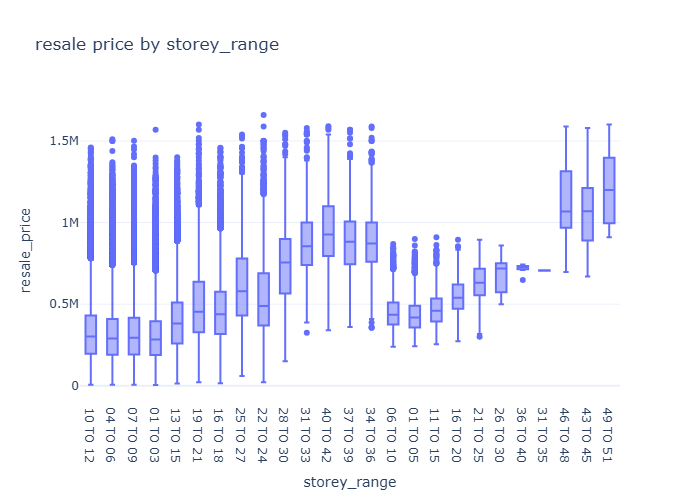

In [30]:
#box plot to compare resale_price distribution across different storey_range
fig=px.box(data, x="storey_range", y="resale_price", title="resale price by storey_range",template="plotly_white").show("png")

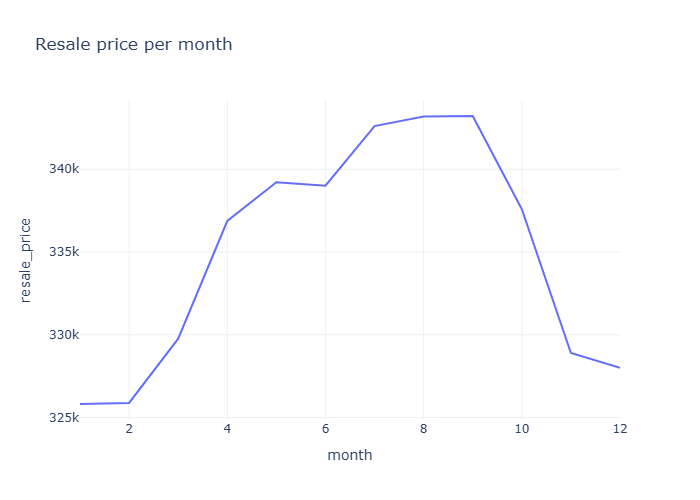

In [31]:
#claculate average resale price for each year to analyze seasonal trends
monthly_avg=data.groupby("month",as_index=False)["resale_price"].mean()

#line plot to visualize how resale prices vary across years
fig=px.line(monthly_avg,x="month",y="resale_price",title="Resale price per month",template="plotly_white")
fig.show("png")

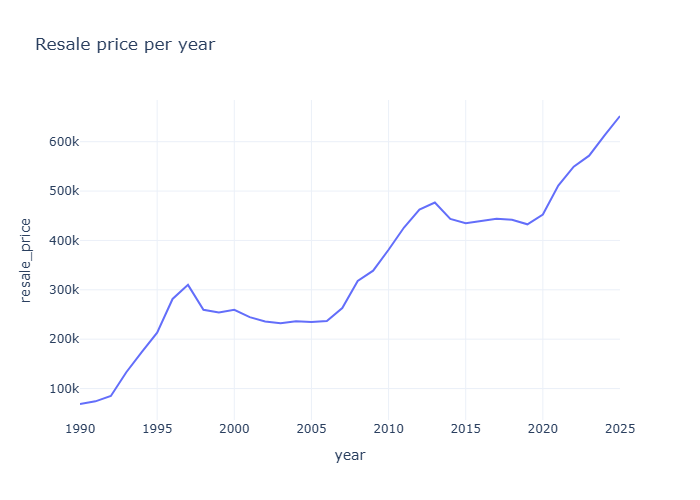

In [32]:
#claculate average resale price for each year to analyze seasonal trends
yearly_avg=data.groupby("year",as_index=False)["resale_price"].mean()

#line plot to visualize how resale prices vary across years
fig=px.line(yearly_avg,x="year",y="resale_price",title="Resale price per year",template="plotly_white")
fig.show("png")

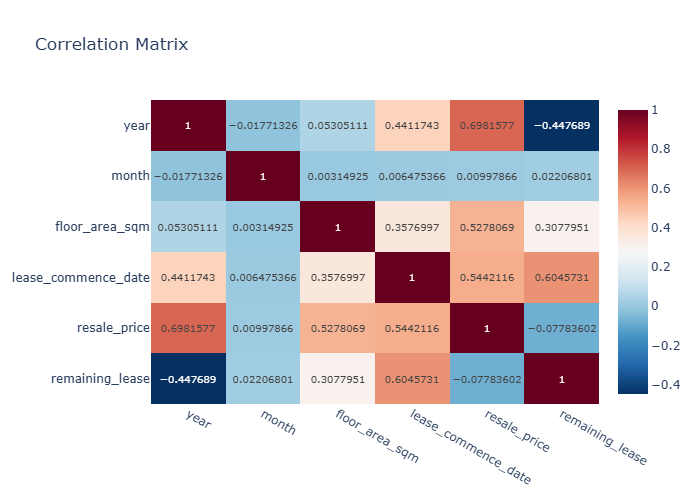

In [33]:
#compute correlation matrix for numerical features to analyze realtionships
corr=data.select_dtypes(include=np.number).corr()

#heatmap to visualize strength and direction of correlations betweenn features
fig=px.imshow(corr,text_auto=True,aspect=True,color_continuous_scale="RdBu_r",title="Correlation Matrix")
fig.update_layout(width=700,height=500)
fig.show("png")

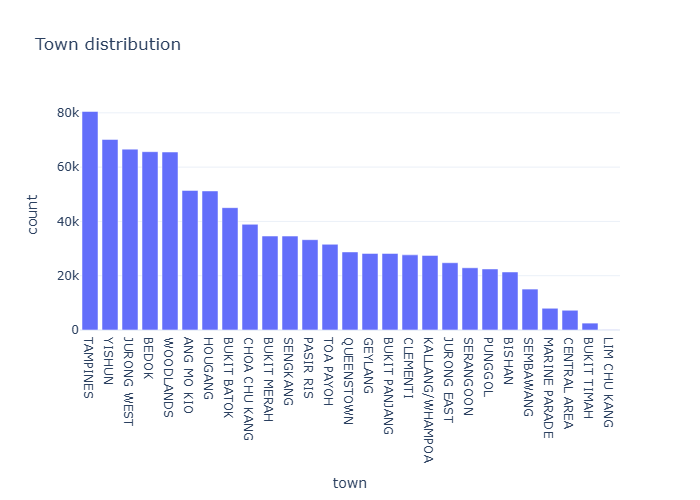

In [34]:
#count the number of resale transactions for each town
town=data.value_counts("town")

#bar chart to visualize distribution of resale transactions across towns
fig=px.bar(town,x=town.index,y=town.values,labels={"x":"town","y":"count"},title="Town distribution",template="plotly_white")
fig.show("png")

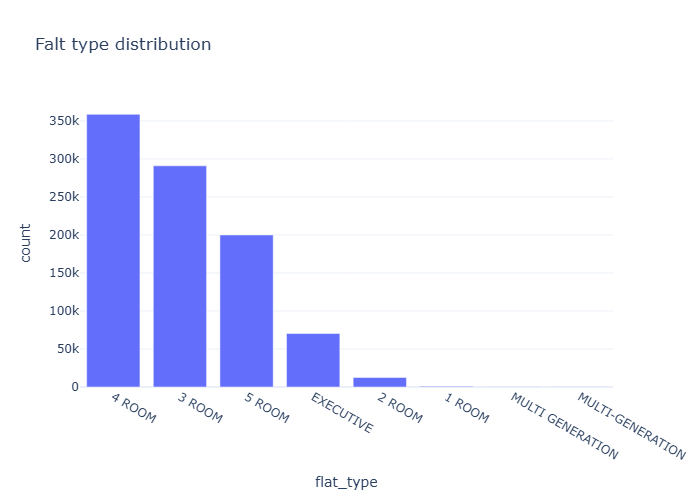

In [35]:
#count the number of resale transactions for each flat_type
flat_type=data.value_counts("flat_type")

#barchart to visualize distribution of resale transactions across flat_types
fig=px.bar(flat_type,x=flat_type.index,y=flat_type.values,labels={"x":"flate type","y":"count"},title="Falt type distribution",template="plotly_white")
fig.show("png")

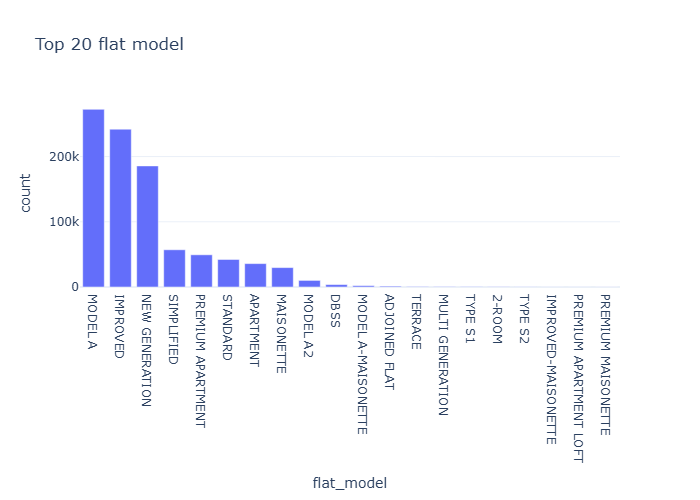

In [36]:
#count the number of resale transactions for each flat_model
flat_model=data.value_counts("flat_model").head(20)

#barchart to visualize distributions of resale transactions across flat_model(top 20)
fig=px.bar(flat_model,x=flat_model.index,y=flat_model.values,labels={"x":"flat model","y":"count"},title="Top 20 flat model",template="plotly_white")
fig.show("png")

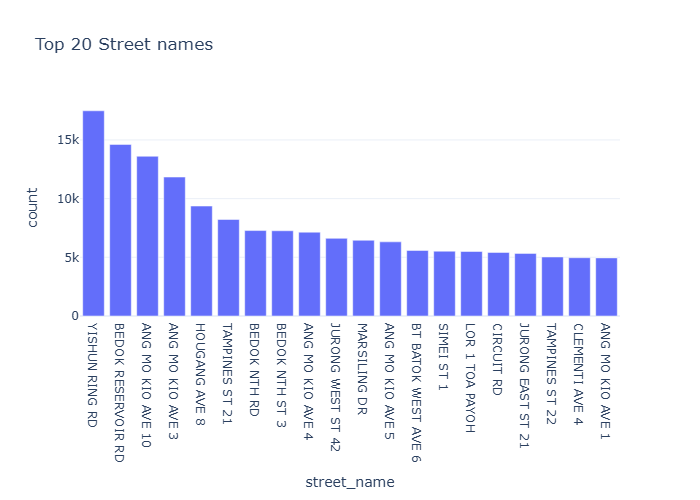

In [37]:
#count the number of resale transactions for each street_names
street_name=data.value_counts("street_name").head(20)

#barchart to visualize distributions of resale transactions across street_names(top 20)
fig=px.bar(street_name,x=street_name.index,y=street_name.values,labels={"X":"street name","y":"count"},title="Top 20 Street names",template="plotly_white")
fig.show("png")

In [38]:
data.to_csv("cleaned_resale_flat_data.csv",index=False)